In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
%matplotlib inline

In [2]:
import datetime
from datetime import datetime

In [ ]:
import csv

def getstuff(filename, criterion):
    with open(filename, "r") as csvfile:
        datareader = csv.reader(csvfile)
        yield next(datareader)  # yield the header row
        count = 0
        for row in datareader:
            if row[3] == criterion:
                yield row
                count += 1
            elif count:
                # done when having read a consecutive series of rows 
                return

In [ ]:
def getdata(filename, criteria):
    for criterion in criteria:
        for row in getstuff(filename, criterion):
            yield row

In [ ]:
#for row in getdata('CrashStatistics.csv', sequence_of_criteria):

In [1]:
import pandas as pd
import dask.dataframe as dd

Ohio = dd.read_csv('CrashStatistics.csv', dtype={'LocalInformation': 'object', 'ReferenceRouteNumber': 'object', 
                    'OtherInvestigationTime': 'float64', 'DividedMedianType': 'object', 'CheckedByBadgeNumber': 'object'},
                  low_memory=False)
Ohio=Ohio.compute()

In [2]:
Ohio.head()

,LocalReportNumber,DocumentNumber,CrashSeverity,HitSkip,LocalInformation,SecondaryCrash,PhotosTaken,OH2,OH3,OH1P,...,PedestrianRelated,SemiTruckRelated,SmallTruckRelated,YouthRelated,TeenRelated,DUI21Related,SeniorRelated,FatalNotReportable,CommercialRelated,CommercialAtFault
0,\t1501010105,20154000002,Fatal,NaN,NaN,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,\t150116,20154000003,Fatal,NaN,NaN,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,\t201500861,20154000004,Fatal,NaN,NaN,False,True,True,True,False,...,True,False,False,True,False,False,False,False,False,False
3,\t2015018,20154000005,Fatal,NaN,NaN,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,\t15-00335,20154000006,Fatal,NaN,NaN,False,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [5]:
(Ohio.columns)

Index(['LocalReportNumber', 'DocumentNumber', 'CrashSeverity', 'HitSkip',
       'LocalInformation', 'SecondaryCrash', 'PhotosTaken', 'OH2', 'OH3',
       'OH1P', 'OHOther', 'PrivateProperty', 'ReportingAgencyNCIC',
       'NumberOfUnits', 'UnitInError', 'County', 'InCityVillageTownship',
       'CityVillageTownshipName', 'CrashDateTime', 'FIPSPlaceCode', 'Latitude',
       'Longitude', 'LocationRouteType', 'LocationRouteNumber',
       'LocationPrefix', 'LocationRoadName', 'LocationRoadType',
       'DistanceFromReference', 'DistanceReferenceMeasurement',
       'DirectionFromReference', 'ReferenceRouteType', 'ReferenceRouteNumber',
       'ReferencePrefix', 'ReferenceName', 'ReferencePointUsed',
       'ReferenceRoadType', 'IntersectionOrApproachRelated',
       'NumberOfApproaches', 'WithinInterchangeArea',
       'LocationFirstHarmfulEvent', 'MannerOfCollision', 'Weather',
       'LightCondition', 'ActiveSchoolZoneRelated', 'WorkZoneRelated',
       'WorkersPresent', 'LawEnforcemen

In [6]:
len(Ohio)

2960589

In [3]:
y = Ohio.dropna(axis=1)

In [8]:
len(y)

2960589

In [9]:
len(y.columns)

55

In [10]:
y.head()

,LocalReportNumber,DocumentNumber,CrashSeverity,SecondaryCrash,PhotosTaken,OH2,OH3,OH1P,OHOther,PrivateProperty,...,PedestrianRelated,SemiTruckRelated,SmallTruckRelated,YouthRelated,TeenRelated,DUI21Related,SeniorRelated,FatalNotReportable,CommercialRelated,CommercialAtFault
0,\t1501010105,20154000002,Fatal,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,\t150116,20154000003,Fatal,False,True,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,\t201500861,20154000004,Fatal,False,True,True,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,\t2015018,20154000005,Fatal,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,\t15-00335,20154000006,Fatal,False,True,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [4]:
y = y[['LocalReportNumber', 'CrashReportedDateTime']]

In [5]:
x=y

In [6]:
x.head()

,LocalReportNumber,CrashReportedDateTime
0,\t1501010105,1/1/2015 3:05:00 PM
1,\t150116,1/13/2015 10:21:00 AM
2,\t201500861,1/7/2015 9:34:00 PM
3,\t2015018,1/11/2015 4:36:00 AM
4,\t15-00335,1/7/2015 10:51:00 PM


In [7]:
from datetime import datetime

In [8]:
x['CrashReportedDateTime'] = pd.to_datetime(x['CrashReportedDateTime'])


#x.CrashReportedDateTime.map(lambda x: x.strftime('%Y-%m-%d'))


#x['CrashReportedDateTime'] = y['CrashReportedDateTime'].to_pydatetime()
#datetime.strptime(y['CrashReportedDateTime'], '%m/%d/%Y %H:%M:%S.%f')
#t.to_pydatetime()

In [ ]:
x.head()

In [9]:
x['CrashReportedDateTime'] = x['CrashReportedDateTime'].dt.date

#df['date_only'] = df['date_time_column'].dt.date

In [10]:
x['CrashReportedDateTime'] = x['CrashReportedDateTime'].apply(lambda x: x.year)

#x['CrashReportedDateTime'] = x['CrashReportedDateTime'].dt.year

In [ ]:
x.CrashReportedDateTime.unique()

In [ ]:
#x.to_csv('OhioCrashYears.csv', index = False, header=True)

In [3]:
x = pd.read_csv('OhioCrashYears.csv')

In [4]:
x.head()

,LocalReportNumber,CrashReportedDateTime
0,\t1501010105,2015
1,\t150116,2015
2,\t201500861,2015
3,\t2015018,2015
4,\t15-00335,2015


In [5]:
df1 = pd.crosstab(x['CrashReportedDateTime'], 'count')
df1

col_0,count
CrashReportedDateTime,
2015,605268
2016,612904
2017,608782
2018,599478
2019,533513
2020,644


In [6]:
df1 = df1.reset_index()

In [7]:
df1.head()

col_0,CrashReportedDateTime,count
0,2015,605268
1,2016,612904
2,2017,608782
3,2018,599478
4,2019,533513


In [8]:
Population = [11617527, 11634370, 11659650, 11676341, 11689100, 11690000]

In [9]:
len(Population)

6

In [10]:
df1['Population'] = Population
df1['Crashes_Normalized'] = df1['count']/df1['Population']

In [11]:
df1.head()

col_0,CrashReportedDateTime,count,Population,Crashes_Normalized
0,2015,605268,11617527,0.052100
1,2016,612904,11634370,0.052680
2,2017,608782,11659650,0.052213
3,2018,599478,11676341,0.051341
4,2019,533513,11689100,0.045642


In [12]:
df2 = df1.iloc[0:5,]

In [13]:
df2

col_0,CrashReportedDateTime,count,Population,Crashes_Normalized
0,2015,605268,11617527,0.052100
1,2016,612904,11634370,0.052680
2,2017,608782,11659650,0.052213
3,2018,599478,11676341,0.051341
4,2019,533513,11689100,0.045642


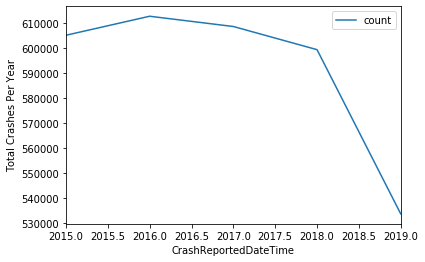

In [14]:
import matplotlib.pylab as plt
%matplotlib inline

# your code here
#Plotting the depth vs accuracy
fig, ax = plt.subplots() #get axis to plot on
df2.plot(ax=ax,x='CrashReportedDateTime',y='count')#, yticks=np.arange(0, 650000, step=500000) #show the data
plt.ylabel('Total Crashes Per Year')
plt.show()

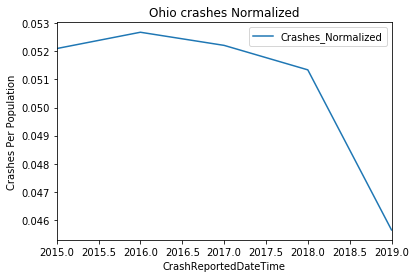

In [15]:
import matplotlib.pylab as plt
%matplotlib inline

# your code here
#Plotting the depth vs accuracy
fig, ax = plt.subplots() #get axis to plot on
df2.plot(ax=ax,x='CrashReportedDateTime',y='Crashes_Normalized', title='Ohio crashes Normalized') #show the data
plt.ylabel('Crashes Per Population')
plt.show()